## Load the datasets

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
state_txn_users = pd.read_excel("phonepe_pulse_raw_data.xlsx", sheet_name="State_Txn and Users")
state_txn_split = pd.read_excel("phonepe_pulse_raw_data.xlsx", sheet_name="State_TxnSplit")
state_device_data = pd.read_excel("phonepe_pulse_raw_data.xlsx", sheet_name="State_DeviceData")
dist_txn_users = pd.read_excel("phonepe_pulse_raw_data.xlsx", sheet_name="District_Txn and Users")
dist_demographics = pd.read_excel("phonepe_pulse_raw_data.xlsx", sheet_name="District Demographics")

## Data Overview

### 1.1 Display the structure

In [22]:
# Print the top 5 rows
state_txn_users.head(5)

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [23]:
# Print the bottom 10 rows
state_txn_split.tail(10)

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
2504,West Bengal,2021,1,Peer-to-peer payments,53869075,2.022402e+11,3754.292226
2505,West Bengal,2021,1,Merchant payments,37143701,2.891834e+10,778.553104
2506,West Bengal,2021,1,Recharge & bill payments,26673733,1.133967e+10,425.124820
2507,West Bengal,2021,1,Financial Services,166727,1.754458e+08,1052.293941
2508,West Bengal,2021,1,Others,400816,2.635025e+08,657.415236
2509,West Bengal,2021,2,Peer-to-peer payments,64661051,2.308123e+11,3569.572026
2510,West Bengal,2021,2,Merchant payments,41696787,3.478787e+10,834.305703
2511,West Bengal,2021,2,Recharge & bill payments,34799709,1.333145e+10,383.090958
2512,West Bengal,2021,2,Financial Services,190537,1.864665e+08,978.636630
2513,West Bengal,2021,2,Others,549353,3.167447e+08,576.577748


In [24]:
# Print the middle 10 rows

# Middle index
rows_n = len(state_device_data)
middle_index = rows_n // 2

# Start and end index for mid 10 rows
start_index = middle_index - 5
end_index = middle_index + 5

# Ensure the indices are within range
#if start_index < 0:
#    start_index = 0
#if end_index > rows_n:
#   end_index = rows_n

# Print the mid 10 rows from df
middle_rows = pd.DataFrame(state_device_data.iloc[start_index : end_index])
middle_rows

,State,Year,Quarter,Brand,Registered Users,Percentage
2767,Ladakh,2021,2,OnePlus,1741,0.023198
2768,Ladakh,2021,2,Motorola,922,0.012285
2769,Ladakh,2021,2,Huawei,894,0.011912
2770,Ladakh,2021,2,Lenovo,490,0.006529
2771,Ladakh,2021,2,Others,2610,0.034778
2772,Lakshadweep,2018,1,Samsung,102,0.203593
2773,Lakshadweep,2018,1,Xiaomi,100,0.199601
2774,Lakshadweep,2018,1,Vivo,67,0.133733
2775,Lakshadweep,2018,1,Oppo,56,0.111776
2776,Lakshadweep,2018,1,Huawei,25,0.049900


In [26]:
# Print the first 10 rows and the last 10 rows
sliced_df = pd.concat([dist_txn_users.head(10), dist_txn_users.tail(10)])
sliced_df

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0
5,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,2.394824e+07,2549.040502,8143,0
6,Andaman & Nicobar Islands,2018,3,Nicobars,AN01,1471,6.387829e+06,4342.507921,467,0
7,Andaman & Nicobar Islands,2018,3,North And Middle Andaman,AN02,1283,4.901530e+06,3820.365954,1208,0
8,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,4.426811e+07,3276.449742,10474,0
9,Andaman & Nicobar Islands,2018,4,Nicobars,AN01,1485,7.180859e+06,4835.595525,536,0


In [27]:
# Print every 10th row of the dataframe
dist_demographics.iloc[::10]

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
10,Andhra Pradesh,Visakhapatnam,Visakhapatnam,4288113,11161.0,384,AP10,Visakhapatnam
20,Arunachal Pradesh,Lepa Rada,Basar,0,0.0,0,AR08,Lepa Rada
30,Arunachal Pradesh,Siang,Pangin,31920,2919.0,11,AR18,Siang
40,Assam,Barpeta,Barpeta,1693622,3245.0,520,AS03,Barpeta
...,...,...,...,...,...,...,...,...
700,Chandigarh,Chandigarh,Chandigarh,1055450,114.0,9258,CH01,Chandigarh
710,Jammu & Kashmir,Jammu,Jammu,1526406,3097.0,596,JK07,Jammu
720,Jammu & Kashmir,Samba,Samba,318611,913.0,318,JK17,Samba
730,Delhi,North Delhi,Sadar Bazaar,887978,59.0,14557,DL04,North


In [28]:
# Other way of doing it--
every_10th_row = dist_demographics[dist_demographics.index % 10 == 0]
every_10th_row

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
10,Andhra Pradesh,Visakhapatnam,Visakhapatnam,4288113,11161.0,384,AP10,Visakhapatnam
20,Arunachal Pradesh,Lepa Rada,Basar,0,0.0,0,AR08,Lepa Rada
30,Arunachal Pradesh,Siang,Pangin,31920,2919.0,11,AR18,Siang
40,Assam,Barpeta,Barpeta,1693622,3245.0,520,AS03,Barpeta
...,...,...,...,...,...,...,...,...
700,Chandigarh,Chandigarh,Chandigarh,1055450,114.0,9258,CH01,Chandigarh
710,Jammu & Kashmir,Jammu,Jammu,1526406,3097.0,596,JK07,Jammu
720,Jammu & Kashmir,Samba,Samba,318611,913.0,318,JK17,Samba
730,Delhi,North Delhi,Sadar Bazaar,887978,59.0,14557,DL04,North


### 1.2 Display basic stats and data types for each dataframe

In [29]:
state_txn_users.dtypes

State                object
Year                  int64
Quarter               int64
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

In [30]:
state_txn_split.dtypes

State                object
Year                  int64
Quarter               int64
Transaction Type     object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
dtype: object

In [31]:
state_device_data.dtypes

State                object
Year                  int64
Quarter               int64
Brand                object
Registered Users      int64
Percentage          float64
dtype: object

In [32]:
dist_txn_users.dtypes

State                object
Year                  int64
Quarter               int64
District             object
Code                 object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

In [18]:
dist_demographics.dtypes

State              object
District           object
Headquarters       object
Population          int64
Area (sq km)      float64
Density             int64
Code               object
Alternate Name     object
dtype: object

In [33]:
state_txn_users.describe()

,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,504.000000,504.000000,5.040000e+02,5.030000e+02,504.000000,5.040000e+02,5.040000e+02
mean,2019.285714,2.357143,4.074000e+07,7.083332e+10,1993.471543,4.777501e+06,9.774471e+07
std,1.031181,1.109971,8.228714e+07,1.440902e+11,607.464894,6.644496e+06,2.042376e+08
min,2018.000000,1.000000,7.780000e+02,1.928611e+06,0.000000,5.010000e+02,0.000000e+00
25%,2018.000000,1.000000,5.925578e+05,1.167157e+09,1598.910667,1.574202e+05,0.000000e+00
50%,2019.000000,2.000000,6.217487e+06,1.051605e+10,1861.380589,1.747914e+06,2.930574e+06
75%,2020.000000,3.000000,4.363675e+07,6.947045e+10,2259.087924,7.320945e+06,8.615022e+07
max,2021.000000,4.000000,5.736165e+08,1.027958e+12,3938.733850,3.966470e+07,1.208084e+09


In [34]:
state_txn_split.describe()

,Year,Quarter,Transactions,Amount (INR),ATV (INR)
count,2514.000000,2514.000000,2.514000e+03,2.514000e+03,2514.000000
mean,2019.286794,2.358393,8.167446e+06,1.443978e+10,1349.927929
std,1.030807,1.109251,2.423645e+07,5.995054e+10,1534.866221
min,2018.000000,1.000000,2.000000e+00,3.439721e+01,17.198606
25%,2018.000000,1.000000,2.788075e+04,1.762412e+07,385.735827
50%,2019.000000,2.000000,2.687980e+05,1.901189e+08,720.940406
75%,2020.000000,3.000000,3.683230e+06,2.661248e+09,1352.790116
max,2021.000000,4.000000,2.795990e+08,8.721520e+11,7767.539936


In [35]:
state_device_data.describe()

,Year,Quarter,Registered Users,Percentage
count,5544.000000,5544.000000,5.544000e+03,5544.000000
mean,2019.285714,2.357143,4.343183e+05,0.090909
std,1.030250,1.108970,9.056069e+05,0.083095
min,2018.000000,1.000000,1.000000e+01,0.006373
25%,2018.000000,1.000000,8.055750e+03,0.021588
50%,2019.000000,2.000000,7.442250e+04,0.056914
75%,2020.000000,3.000000,3.978875e+05,0.143626
max,2021.000000,4.000000,9.764252e+06,0.478367


In [36]:
dist_txn_users.describe()

,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,10248.000000,10248.000000,1.024800e+04,1.024800e+04,10244.000000,1.024800e+04,1.024800e+04
mean,2019.285714,2.357143,2.003607e+06,3.542311e+09,1909.796545,2.349591e+05,4.807117e+06
std,1.030208,1.108924,9.613466e+06,1.473154e+10,600.943349,4.605978e+05,1.562541e+07
min,2018.000000,1.000000,0.000000e+00,0.000000e+00,84.944283,2.200000e+01,0.000000e+00
25%,2018.000000,1.000000,1.031418e+05,1.756668e+08,1554.589051,3.619550e+04,0.000000e+00
50%,2019.000000,2.000000,3.763065e+05,6.784562e+08,1863.135530,1.067640e+05,6.403025e+05
75%,2020.000000,3.000000,1.272815e+06,2.377256e+09,2203.083552,2.573165e+05,4.346320e+06
max,2021.000000,4.000000,3.487128e+08,4.444224e+11,11209.980550,1.060461e+07,5.544197e+08


In [37]:
dist_demographics.describe()

,Population,Area (sq km),Density
count,7.420000e+02,742.000000,742.000000
mean,1.668555e+06,4395.373120,838.512129
std,1.458849e+06,4254.676124,2754.406896
min,0.000000e+00,0.000000,0.000000
25%,6.530815e+05,2039.750000,198.000000
50%,1.322359e+06,3402.500000,353.000000
75%,2.297440e+06,5432.750000,686.250000
max,1.008285e+07,45652.000000,36155.000000


### 1.3 Check for missing values and its percentage

In [38]:
state_txn_users.isna().any().any()

np.True_

In [39]:
state_txn_users.isna().sum() * 100 / len(state_txn_users)   #len gives number of rows

State               0.000000
Year                0.000000
Quarter             0.000000
Transactions        0.000000
Amount (INR)        0.198413
ATV (INR)           0.000000
Registered Users    0.000000
App Opens           0.000000
dtype: float64

In [40]:
state_txn_split.isna().any().any()

np.False_

In [42]:
state_device_data.isna().any().any()

np.False_

In [43]:
dist_txn_users.isna().any().any()

np.True_

In [44]:
dist_txn_users.isna().sum() * 100 / len(dist_txn_users)

State               0.000000
Year                0.000000
Quarter             0.000000
District            0.000000
Code                0.273224
Transactions        0.000000
Amount (INR)        0.000000
ATV (INR)           0.039032
Registered Users    0.000000
App Opens           0.000000
dtype: float64

In [45]:
dist_demographics.isna().any().any()

np.False_

### 1.4 Create a summary

In [46]:
# Calculate total number of states
total_states = len(dist_demographics["State"].value_counts())
total_states

36

In [47]:
# Calculate total number of districts
total_districts = len(dist_demographics["District"].value_counts())
total_districts

736

In [48]:
# Identify state with highest number of district
district_count = dist_demographics["State"].value_counts()
highest_index = district_count.idxmax()
highest_index

'Uttar Pradesh'

## Exploratory Data Analysis (EDA)

### 2.1 Analyze transaction trends over the years for each state

In [49]:
state_txn_users.head(5)

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [50]:
# Calculate total number of transactions and transaction amount for each state over the years
df1 = state_txn_users.groupby(["State","Year"])[["Transactions","Amount (INR)"]].sum()
df1

Transactions  Amount (INR)
State                     Year                            
Andaman & Nicobar Islands 2018         58021  1.890761e+08
                          2019        133104  4.734648e+08
                          2020        446274  1.296423e+09
                          2021        586166  1.682854e+09
Andhra Pradesh            2018      77779112  1.220720e+11
...                                      ...           ...
Uttarakhand               2021      44608834  7.727901e+10
West Bengal               2018     120011635  1.115887e+11
                          2019     257900590  2.660145e+11
                          2020     304222327  5.527316e+11
                          2021     260151489  5.223720e+11

[144 rows x 2 columns]

In [51]:
# Top5 states with highest transaction volume and lowest transaction volumes
state_wise_df = state_txn_users.groupby(["State"])[["Transactions","Amount (INR)"]].sum()
top5_highest_volume = state_wise_df.nlargest(5,"Amount (INR)")
bottom5_lowest_volume = state_wise_df.nsmallest(5, "Amount (INR)")

In [52]:
# Percentage contribution of top5 states in transaction volume 
total_volume = state_txn_users['Amount (INR)'].sum()
top5_total = top5_highest_volume['Amount (INR)'].sum()
top5_contribution = top5_total / total_volume * 100
top5_contribution

np.float64(53.43956661279285)

In [53]:
# Top 5 States
top5_highest_volume['Percent_with_total'] = top5_highest_volume['Amount (INR)'] / total_volume * 100
top5_highest_volume

,Transactions,Amount (INR),Percent_with_total
State,,,
Telangana,2347430243,4.574246e+12,12.838489
Karnataka,2981044533,4.361396e+12,12.241085
Maharashtra,2833670154,4.290995e+12,12.043493
Andhra Pradesh,1781091169,3.187847e+12,8.947299
Rajasthan,1382918930,2.625584e+12,7.369201


In [54]:
# Percentage contribution of bottom 5 states in transaction volume
bottom5_total = bottom5_lowest_volume['Amount (INR)'].sum()
bottom5_contribution = bottom5_total / total_volume * 100
bottom5_contribution

np.float64(0.08223521999845301)

In [55]:
# Bottom 5 states
bottom5_lowest_volume['Percent_with_total'] = bottom5_lowest_volume['Amount (INR)'] / total_volume * 100
bottom5_lowest_volume

,Transactions,Amount (INR),Percent_with_total
State,,,
Lakshadweep,71610,1.921587e+08,0.000539
Andaman & Nicobar Islands,1223565,3.641818e+09,0.010221
Mizoram,2162776,6.317141e+09,0.017730
Ladakh,1880109,6.606978e+09,0.018544
Meghalaya,5648913,1.254162e+10,0.035200


In [56]:
# Percentage difference in top state volume and bottom state
Difference = (top5_highest_volume.loc['Telangana','Amount (INR)'] - bottom5_lowest_volume.loc['Lakshadweep','Amount (INR)']) / total_volume * 100
Difference

np.float64(12.83794983474443)

### 2.2 Most common transaction type in each year and quarter

In [57]:
state_txn_split.head(10)

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06,439.358921
1,Andaman & Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07,6487.790112
2,Andaman & Nicobar Islands,2018,1,Merchant payments,298,4.525072e+05,1518.480432
3,Andaman & Nicobar Islands,2018,1,Financial Services,33,1.060142e+04,321.255149
4,Andaman & Nicobar Islands,2018,1,Others,256,1.846899e+05,721.444790
5,Andaman & Nicobar Islands,2018,2,Recharge & bill payments,6735,2.320945e+06,344.609463
6,Andaman & Nicobar Islands,2018,2,Peer-to-peer payments,3575,2.451193e+07,6856.482582
7,Andaman & Nicobar Islands,2018,2,Merchant payments,603,1.024491e+06,1698.990072
8,Andaman & Nicobar Islands,2018,2,Financial Services,59,1.213360e+05,2056.542832
9,Andaman & Nicobar Islands,2018,2,Others,368,3.598385e+05,977.822025


In [59]:
df2 = pd.DataFrame(state_txn_split.groupby(["Year","Quarter","Transaction Type"])["Transactions"].sum()).reset_index()
idx = df2.groupby(["Year","Quarter"])["Transactions"].idxmax()
result2 = df2.loc[idx, ["Year","Quarter","Transaction Type","Transactions"]]
result2

,Year,Quarter,Transaction Type,Transactions
4,2018,1,Recharge & bill payments,72550031
9,2018,2,Recharge & bill payments,92033187
13,2018,3,Peer-to-peer payments,202021002
18,2018,4,Peer-to-peer payments,200234112
23,2019,1,Peer-to-peer payments,404839516
28,2019,2,Peer-to-peer payments,384709806
33,2019,3,Peer-to-peer payments,461911031
38,2019,4,Peer-to-peer payments,703496154
43,2020,1,Peer-to-peer payments,693997734
48,2020,2,Peer-to-peer payments,631030330


In [60]:
# Percentage contribution of the most common transaction type
total_transactions = state_txn_split['Transactions'].sum()
ttype_sum = state_txn_split.groupby('Transaction Type')['Transactions'].sum()
print(ttype_sum)
print()
peer_to_peer = ttype_sum['Peer-to-peer payments'] / total_transactions * 100
merchant = ttype_sum['Merchant payments'] / total_transactions * 100
diff = peer_to_peer - merchant
print(f"Peer-to-peer payments % - {peer_to_peer}\nMerchant payments % - {merchant}\nDifference in % - {diff}")

Transaction Type
Financial Services            47996333
Merchant payments           6959228853
Others                       117964108
Peer-to-peer payments       9161937793
Recharge & bill payments    4245833207
Name: Transactions, dtype: int64

Peer-to-peer payments % - 44.6206375593939
Merchant payments % - 33.892964060489504
Difference in % - 10.727673498904394


### 2.3 Device brand with highest number of registered users in each state

In [61]:
state_device_data.head(5)

,State,Year,Quarter,Brand,Registered Users,Percentage
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033
1,Andaman & Nicobar Islands,2018,1,Samsung,1445,0.214392
2,Andaman & Nicobar Islands,2018,1,Vivo,982,0.145697
3,Andaman & Nicobar Islands,2018,1,Oppo,501,0.074332
4,Andaman & Nicobar Islands,2018,1,OnePlus,332,0.049258


In [62]:
# Device brand with highest number of registered users for each state
result1 = state_device_data.sort_values(["State","Registered Users"], ascending = [True, False]).drop_duplicates("State")[["State","Brand","Registered Users"]]
result1

,State,Brand,Registered Users
143,Andaman & Nicobar Islands,Vivo,15056
297,Andhra Pradesh,Xiaomi,4937684
451,Arunachal Pradesh,Vivo,63439
605,Assam,Xiaomi,909274
759,Bihar,Xiaomi,4268361
913,Chandigarh,Xiaomi,101761
1067,Chhattisgarh,Vivo,1169224
1221,Dadra & Nagar Haveli and Daman & Diu,Vivo,87001
1375,Delhi,Xiaomi,2731995
1529,Goa,Xiaomi,152107


In [63]:
# Other way of doing it--
idx = state_device_data.groupby("State")["Registered Users"].idxmax()
result2 = state_device_data.loc[idx,["State","Brand","Registered Users"]]
result2

,State,Brand,Registered Users
143,Andaman & Nicobar Islands,Vivo,15056
297,Andhra Pradesh,Xiaomi,4937684
451,Arunachal Pradesh,Vivo,63439
605,Assam,Xiaomi,909274
759,Bihar,Xiaomi,4268361
913,Chandigarh,Xiaomi,101761
1067,Chhattisgarh,Vivo,1169224
1221,Dadra & Nagar Haveli and Daman & Diu,Vivo,87001
1375,Delhi,Xiaomi,2731995
1529,Goa,Xiaomi,152107


In [64]:
# Percentage contribution of the device brand with highest registered users
total_users = state_device_data['Registered Users'].sum()
device_users_sum = state_device_data.groupby('Brand')['Registered Users'].sum()
#print(device_users_sum)
#print()
highest = device_users_sum['Xiaomi'] / total_users * 100
second_highest = device_users_sum['Samsung'] / total_users * 100
print(f"Highest Users Device Brand - Xiaomi: {highest}\nSecond highest Users Device Brand Samsung: {second_highest}")

Highest Users Device Brand - Xiaomi: 25.564875438148682
Second highest Users Device Brand Samsung: 19.96791764236327


### 2.4 List of top districts per state based on population

In [65]:
dist_demographics.head(5)

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
1,Andhra Pradesh,Chittoor,Chittoor,4170468,15152.0,275,AP02,Chittoor
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.0,477,AP03,East Godavari
3,Andhra Pradesh,Guntur,Guntur,4889230,11391.0,429,AP04,Guntur
4,Andhra Pradesh,YSR,Kadapa,2884524,15359.0,188,AP13,YSR


In [66]:
# Highest population districts for each state
result3 = dist_demographics.loc[dist_demographics.groupby("State")["Population"].idxmax(),["State","District","Population"]]
result3["District, State"] = result3["District"] + ", " + result3["State"]
result3

,State,District,Population,"District, State"
699,Andaman & Nicobar Islands,South Andaman,238142,"South Andaman, Andaman & Nicobar Islands"
2,Andhra Pradesh,East Godavari,5151549,"East Godavari, Andhra Pradesh"
28,Arunachal Pradesh,Papum Pare,176385,"Papum Pare, Arunachal Pradesh"
64,Assam,Nagaon,2826006,"Nagaon, Assam"
97,Bihar,Patna,5772804,"Patna, Bihar"
700,Chandigarh,Chandigarh,1055450,"Chandigarh, Chandigarh"
133,Chhattisgarh,Raipur,2160876,"Raipur, Chhattisgarh"
703,Dadra & Nagar Haveli and Daman & Diu,Dadra and Nagar Haveli,343709,"Dadra and Nagar Haveli, Dadra & Nagar Haveli a..."
732,Delhi,North West Delhi,3656539,"North West Delhi, Delhi"
138,Goa,North Goa,817761,"North Goa, Goa"


C:\Users\hp\AppData\Local\Temp\ipykernel_21888\1242373190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = result3, x = "District, State", y = "Population", palette = "muted")


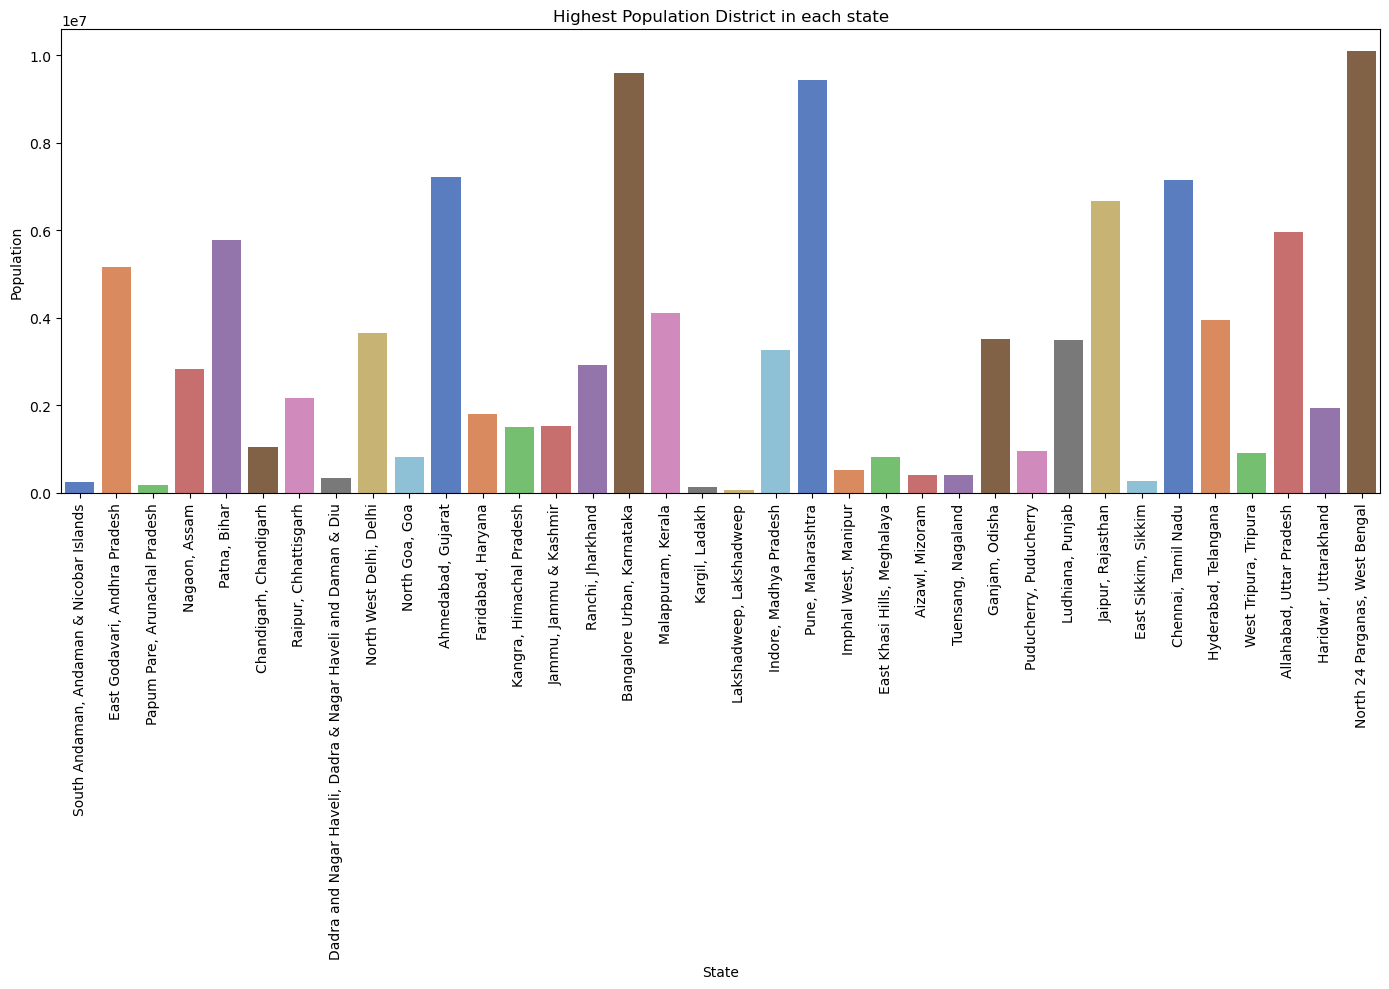

In [67]:
# Column Chart depicting highest population districts for each state
plt.figure(figsize=(14,10))
sns.barplot(data = result3, x = "District, State", y = "Population", palette = "muted")

plt.xticks(rotation=90)
plt.title("Highest Population District in each state")
plt.xlabel("State")
plt.ylabel("Population")

plt.tight_layout()
plt.show()

In [68]:
dist_demographics.head(5)

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
1,Andhra Pradesh,Chittoor,Chittoor,4170468,15152.0,275,AP02,Chittoor
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.0,477,AP03,East Godavari
3,Andhra Pradesh,Guntur,Guntur,4889230,11391.0,429,AP04,Guntur
4,Andhra Pradesh,YSR,Kadapa,2884524,15359.0,188,AP13,YSR


### 2.5 Average Transaction Value for each state

In [69]:
dist_txn_users.head(5)

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0


In [70]:
atv_state = pd.DataFrame(dist_txn_users.groupby("State")["ATV (INR)"].mean())
atv_state

,ATV (INR)
State,
Andaman & Nicobar Islands,3273.392542
Andhra Pradesh,1953.623767
Arunachal Pradesh,2678.605340
Assam,1839.568384
Bihar,2061.135429
Chandigarh,2113.797075
Chhattisgarh,1763.384439
Dadra & Nagar Haveli and Daman & Diu,1627.099576
Delhi,1569.462534


In [71]:
# Top 5 states with highest ATV
highest_atv = atv_state.nlargest(5,"ATV (INR)")
highest_atv

,ATV (INR)
State,
Ladakh,3391.265233
Andaman & Nicobar Islands,3273.392542
Mizoram,3010.327017
Lakshadweep,2776.118701
Arunachal Pradesh,2678.605340


In [72]:
# Top 5 with lowest ATV
lowest_atv = atv_state.nsmallest(5, "ATV (INR)")
lowest_atv

,ATV (INR)
State,
West Bengal,1377.639842
Tripura,1548.465799
Delhi,1569.462534
Maharashtra,1589.759225
Odisha,1593.026649


In [73]:
# Scale difference between -
# A high ATV low volume state- Ladakh and a low ATV high volume state - Maharashtra

scale_diff = (highest_atv.loc["Ladakh","ATV (INR)"] - lowest_atv.loc["Maharashtra","ATV (INR)"]) / highest_atv.loc["Ladakh","ATV (INR)"] * 100
scale_diff

np.float64(53.12194370269406)

### 2.6 App usage trends

In [74]:
state_txn_users.head(5)

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [75]:
# Number of app opens by year for each state
app_opens = pd.DataFrame(state_txn_users.groupby(["State","Year"])["App Opens"].sum()).reset_index()
app_opens

,State,Year,App Opens
0,Andaman & Nicobar Islands,2018,0
1,Andaman & Nicobar Islands,2019,400759
2,Andaman & Nicobar Islands,2020,1901431
3,Andaman & Nicobar Islands,2021,3252559
4,Andhra Pradesh,2018,0
...,...,...,...
139,Uttarakhand,2021,137662296
140,West Bengal,2018,0
141,West Bengal,2019,470399825
142,West Bengal,2020,943934300


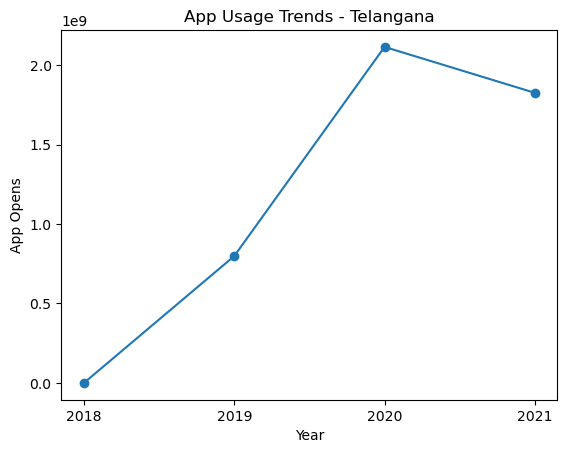

In [76]:
## Line plot for app usage trends
telangana = app_opens[app_opens["State"] == "Telangana"].copy()
telangana["Year"] = telangana["Year"].astype(str)

plt.plot(telangana["Year"], telangana["App Opens"], marker = "o")

plt.title("App Usage Trends - Telangana")
plt.xlabel("Year")
plt.ylabel("App Opens")
plt.show()

### 2.7 Distribution of Transaction Types

In [78]:
state_txn_split.head(5)

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06,439.358921
1,Andaman & Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07,6487.790112
2,Andaman & Nicobar Islands,2018,1,Merchant payments,298,4.525072e+05,1518.480432
3,Andaman & Nicobar Islands,2018,1,Financial Services,33,1.060142e+04,321.255149
4,Andaman & Nicobar Islands,2018,1,Others,256,1.846899e+05,721.444790


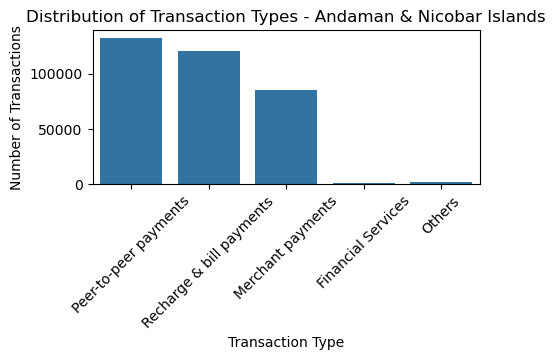

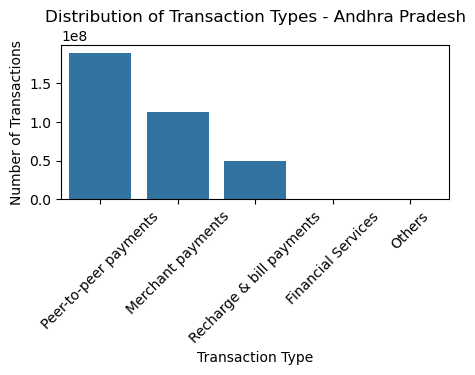

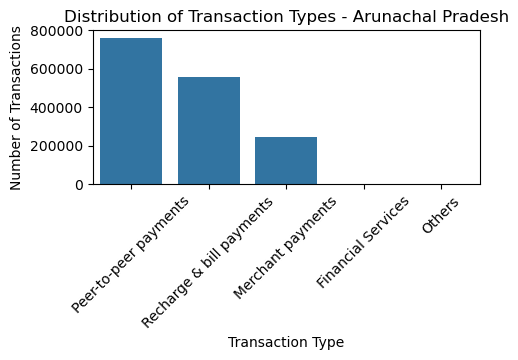

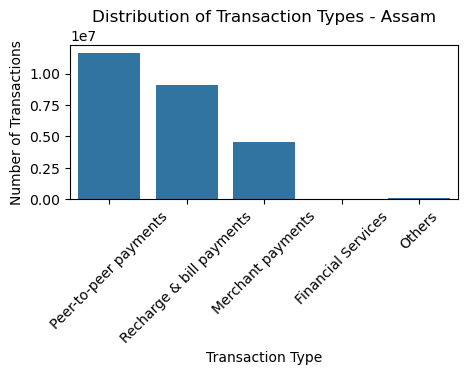

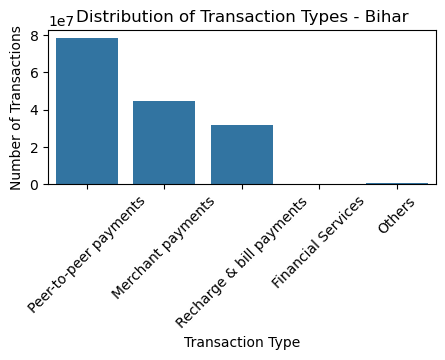

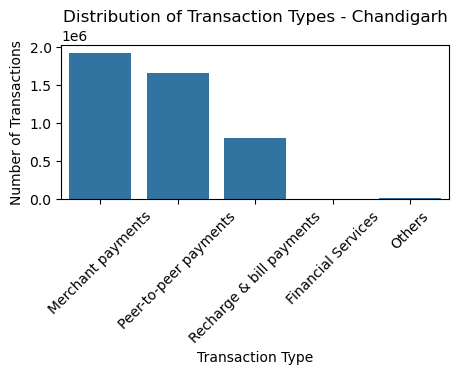

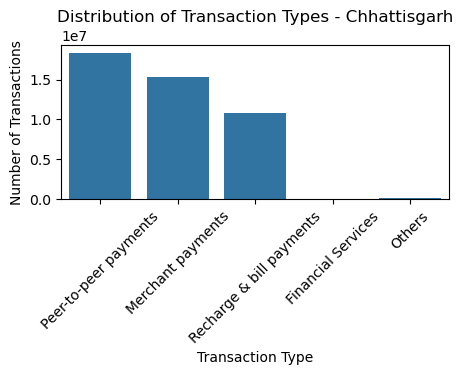

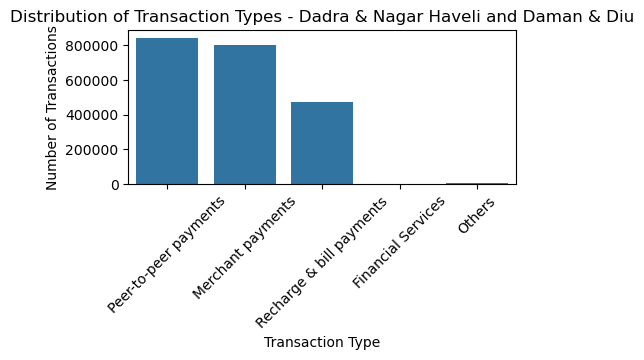

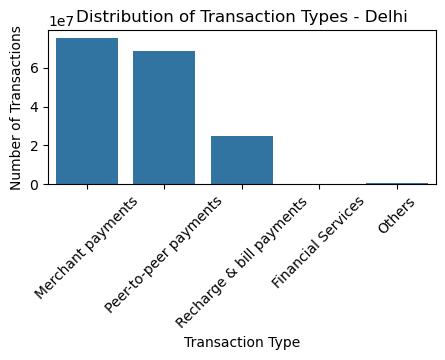

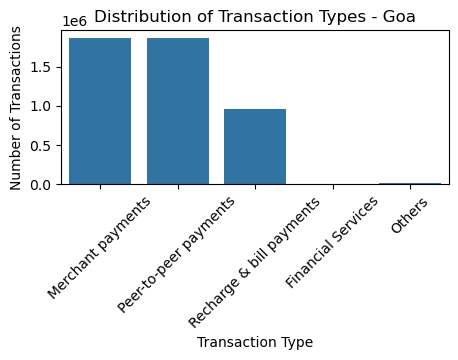

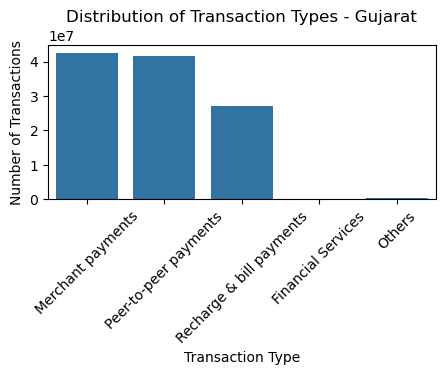

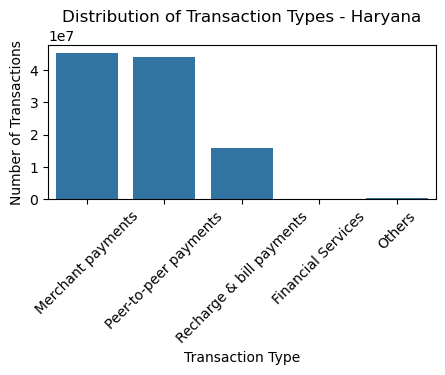

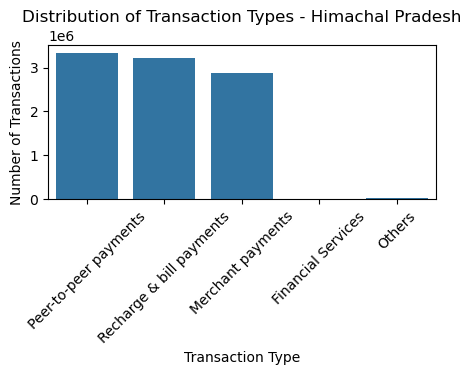

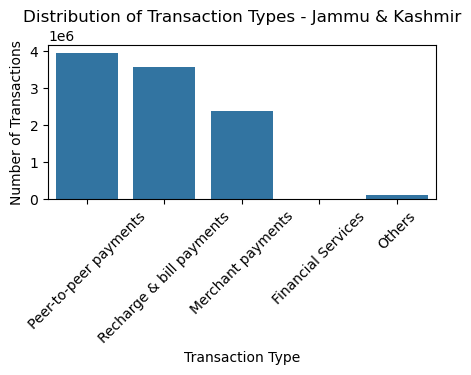

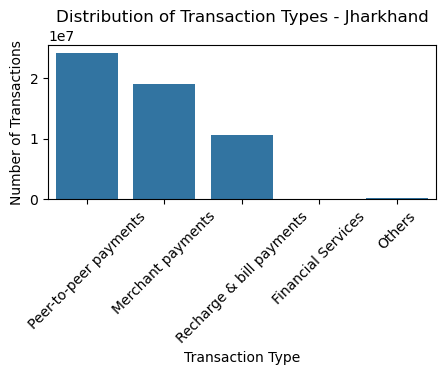

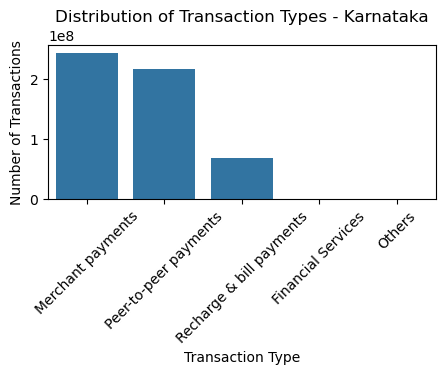

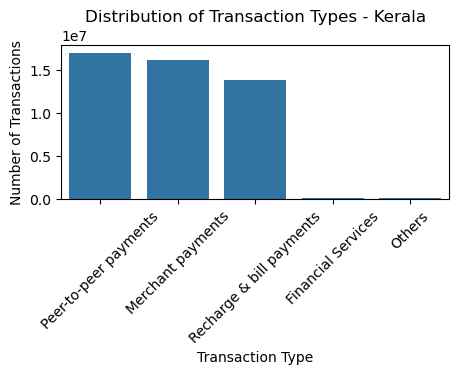

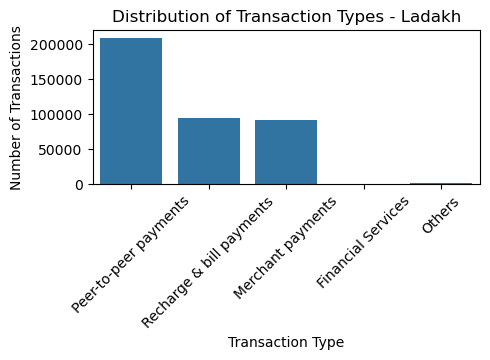

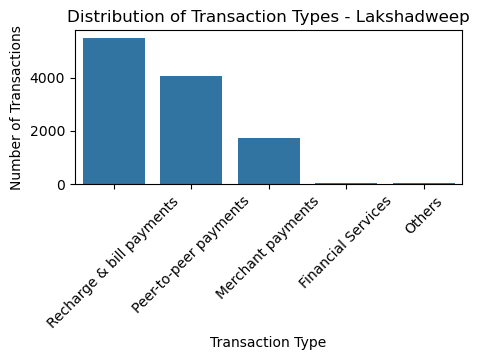

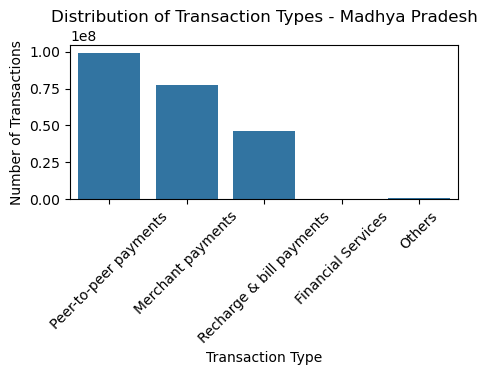

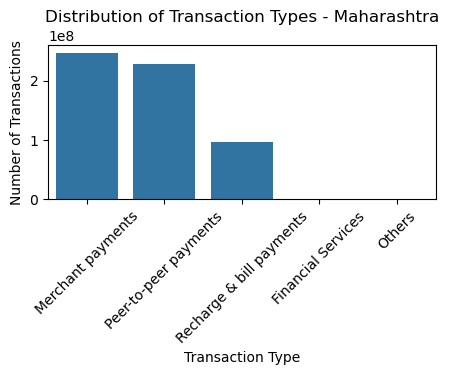

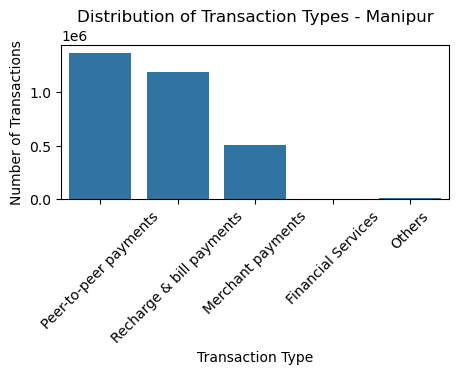

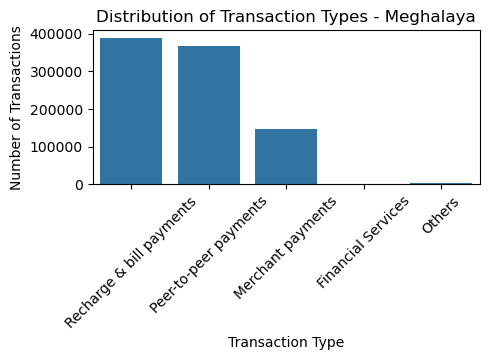

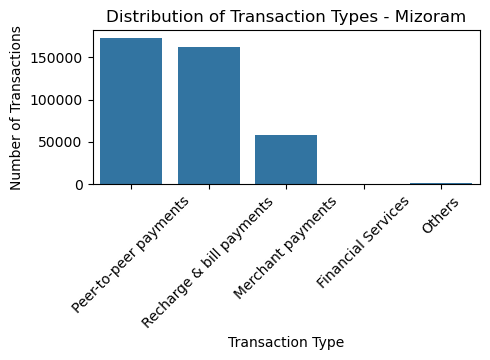

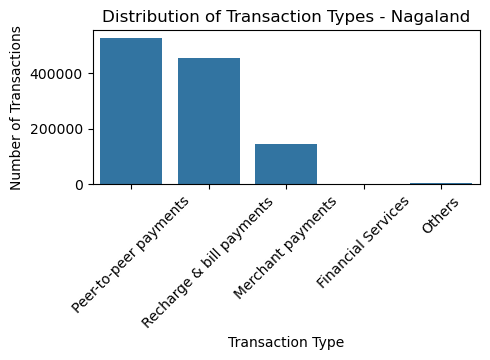

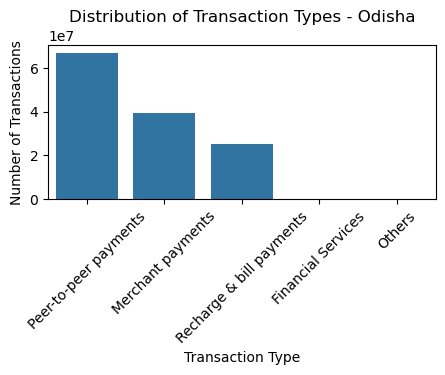

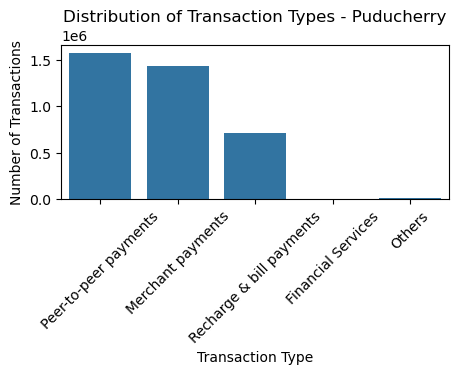

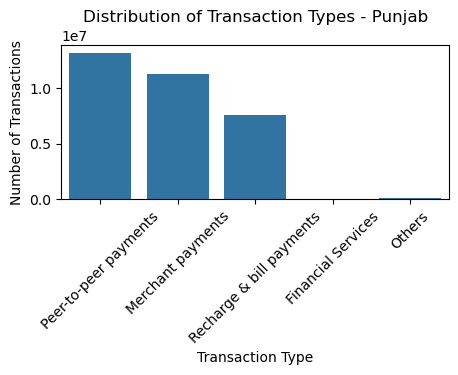

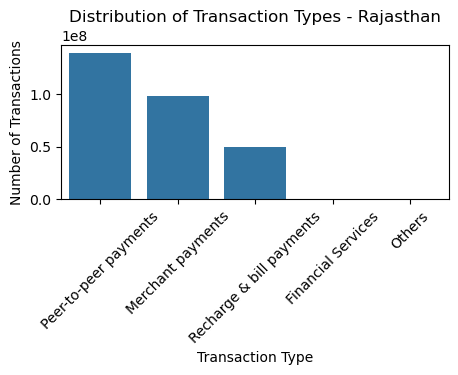

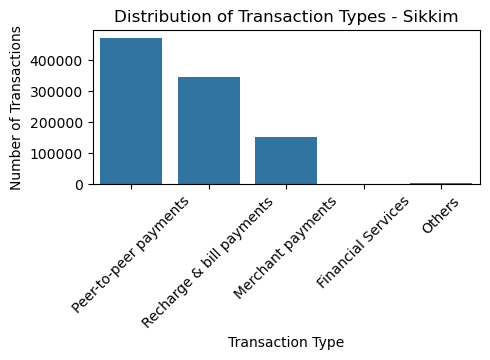

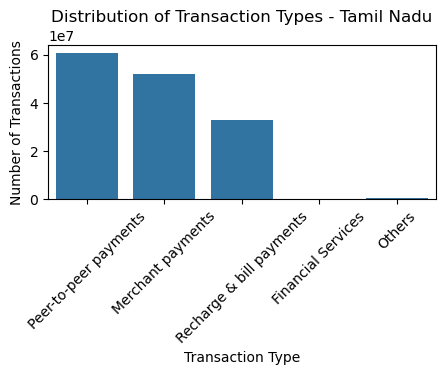

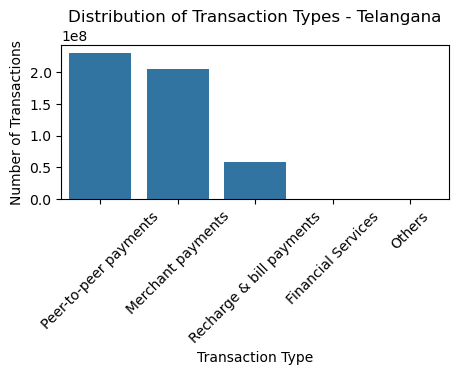

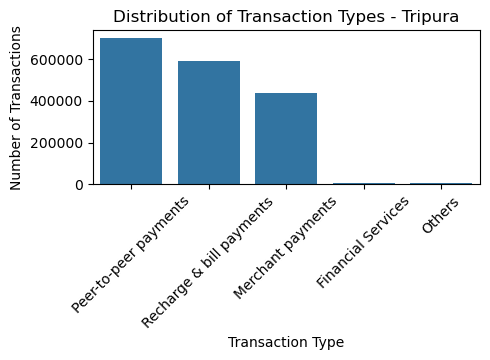

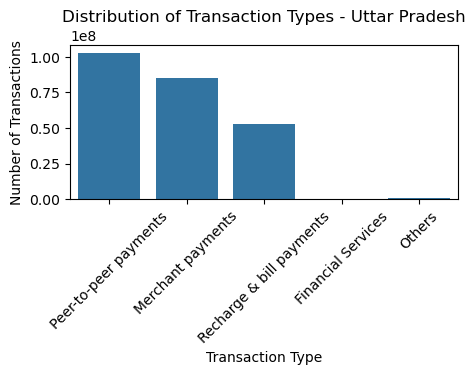

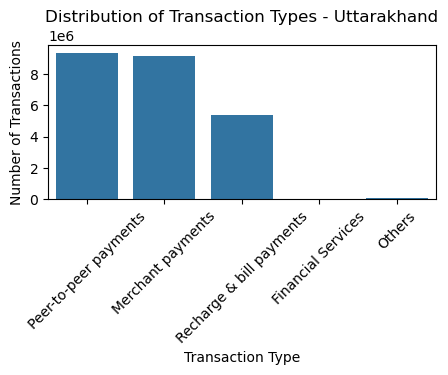

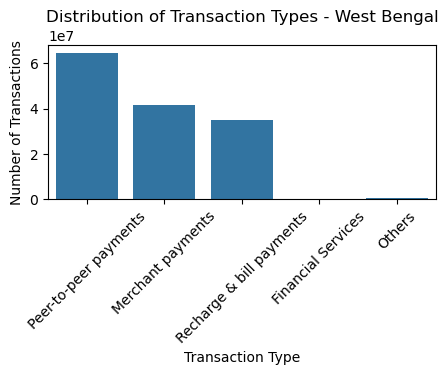

In [79]:
# Filter the data for a specific period
ttype_recent = state_txn_split[(state_txn_split["Year"] == 2021) & (state_txn_split["Quarter"] == 2)]

# Loop through group(State) to create a bar chart showing transaction types 
for state, data in ttype_recent.groupby("State"):
    plt.figure(figsize=(5, 2))
    sns.barplot(data = data, x = "Transaction Type", y = "Transactions")

    plt.title(f"Distribution of Transaction Types - {state}")
    plt.xlabel("Transaction Type")
    plt.ylabel("Number of Transactions")
    plt.xticks(rotation=45)
    plt.show()

### 2.8 Unique Mapping between district name and code

In [80]:
dist_txn_users.head(5)

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0


In [81]:
dist_code = dist_txn_users[["District","Code"]].drop_duplicates().sort_values(by= "District")
dist_code.to_csv("District Codes", index=False)

## 3. Data Quality Checks

In [82]:
state_txn_users.head(5)

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [83]:
dist_level = dist_txn_users.groupby("State")[["Transactions","Amount (INR)","Registered Users"]].sum()

In [84]:
# Transactions, Amount & Registered users check
dist_level["T_check"] = dist_level["Transactions"] - state_txn_users["Transactions"]
dist_level["A_check"] = dist_level["Amount (INR)"] - state_txn_users["Amount (INR)"]
dist_level["U_check"] = dist_level["Registered Users"] - state_txn_users["Registered Users"]
dist_level[(dist_level["T_check"].notna())| (dist_level["A_check"].notna()) | (dist_level["U_check"].notna())]

,Transactions,Amount (INR),Registered Users,T_check,A_check,U_check
State,,,,,,


## 4. Data Merging and Advanced Analysis

### 4.1 Ratio of Users to population by state

In [87]:
# Ratio of Registered Users to Population for each state

# Total population for each state
grouped_dist_demographics = dist_demographics.groupby("State")[["Population"]].sum()

# Total registered users for each state at the end of the period
total_registered_users = state_txn_users[(state_txn_users["Year"] == 2021) & (state_txn_users["Quarter"] == 2)][["State","Registered Users"]]

# Merged the 2 datasets and calculated the ratio
merged_df = pd.merge(total_registered_users, grouped_dist_demographics, on = "State", how = "inner")
merged_df["Ratio_RtoP"] = merged_df["Registered Users"] / merged_df["Population"]
merged_df

,State,Registered Users,Population,Ratio_RtoP
0,Andaman & Nicobar Islands,62095,380581,0.163158
1,Andhra Pradesh,19620905,49378776,0.397355
2,Arunachal Pradesh,270572,1606047,0.168471
3,Assam,3617056,34461385,0.104960
4,Bihar,14972134,103817951,0.144215
5,Chandigarh,448572,1055450,0.425005
6,Chhattisgarh,4837055,25867958,0.186990
7,Dadra & Nagar Haveli and Daman & Diu,344994,586956,0.587768
8,Delhi,11182699,16787941,0.666115
9,Goa,609106,1457723,0.417848


C:\Users\hp\AppData\Local\Temp\ipykernel_21888\226950820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = merged_df, x = "State", y = "Ratio_RtoP", palette = 'dark')


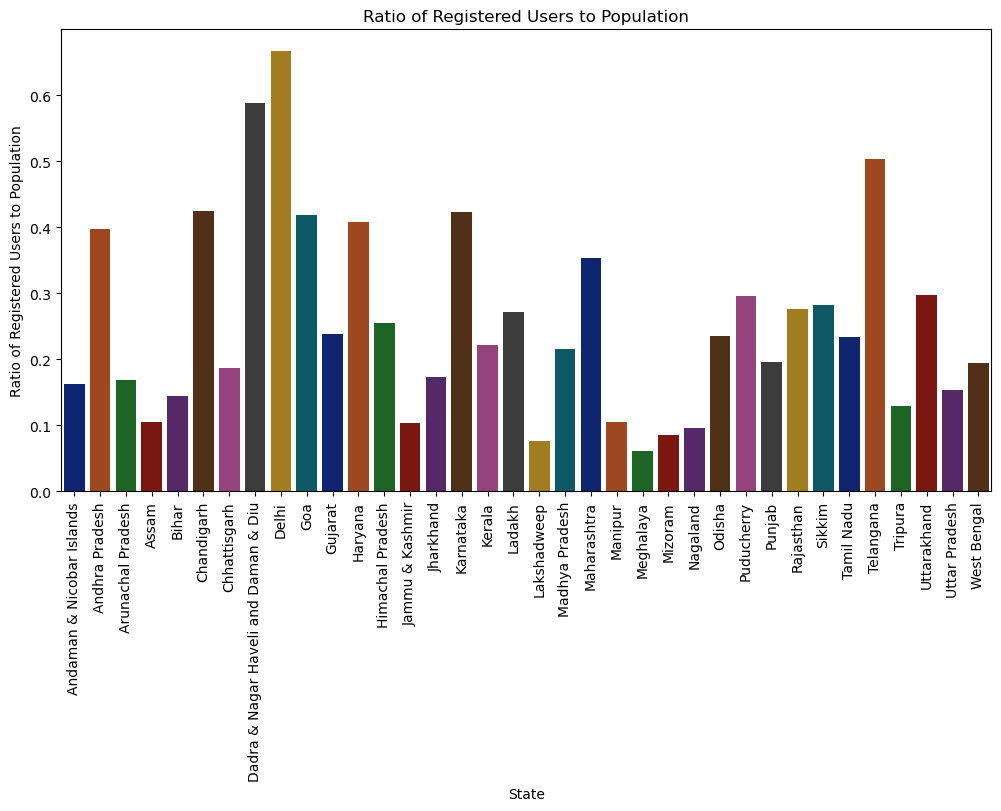

In [88]:
## Bar chart for the ratio of registered users to population for each state
plt.figure(figsize = (12,6))
sns.barplot(data = merged_df, x = "State", y = "Ratio_RtoP", palette = 'dark')

plt.title("Ratio of Registered Users to Population", fontsize=12)
plt.xlabel("State")
plt.ylabel("Ratio of Registered Users to Population")
plt.xticks(rotation=90)
plt.show()

### 4.2 Correlation between population density and transaction volume

In [89]:
dist_txn_users.head(5)

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0


In [90]:
dist_demographics.head(5)

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
1,Andhra Pradesh,Chittoor,Chittoor,4170468,15152.0,275,AP02,Chittoor
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.0,477,AP03,East Godavari
3,Andhra Pradesh,Guntur,Guntur,4889230,11391.0,429,AP04,Guntur
4,Andhra Pradesh,YSR,Kadapa,2884524,15359.0,188,AP13,YSR


In [91]:
dist_merge = pd.merge(dist_txn_users, dist_demographics, on = "District", how = "inner")
dist_merge

,State_x,Year,Quarter,District,Code_x,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens,State_y,Headquarters,Population,Area (sq km),Density,Code_y,Alternate Name
0,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0,Andaman & Nicobar Islands,Port Blair,238142,2672.0,89,AN03,South Andaman
1,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,2.394824e+07,2549.040502,8143,0,Andaman & Nicobar Islands,Port Blair,238142,2672.0,89,AN03,South Andaman
2,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,4.426811e+07,3276.449742,10474,0,Andaman & Nicobar Islands,Port Blair,238142,2672.0,89,AN03,South Andaman
3,Andaman & Nicobar Islands,2018,4,South Andaman,AN03,20136,7.541184e+07,3745.125189,13133,0,Andaman & Nicobar Islands,Port Blair,238142,2672.0,89,AN03,South Andaman
4,Andaman & Nicobar Islands,2019,1,South Andaman,AN03,25683,8.550197e+07,3329.127142,15961,0,Andaman & Nicobar Islands,Port Blair,238142,2672.0,89,AN03,South Andaman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,West Bengal,2021,2,Paschim Medinipur,WB18,5051834,1.030351e+10,2039.558976,856640,16201033,West Bengal,Midnapore,4776909,6308.0,757,WB18,Paschim Medinipur
8942,West Bengal,2021,2,Purba Bardhaman,WB19,3920729,7.572502e+09,1931.401639,787970,12128849,West Bengal,Bardhaman,4835532,5433.0,890,WB19,Purba Bardhaman
8943,West Bengal,2021,2,Purba Medinipur,WB20,6418522,1.515507e+10,2361.146027,946277,15491958,West Bengal,Tamluk,5095875,4736.0,1076,WB20,Purba Medinipur
8944,West Bengal,2021,2,Purulia,WB21,1895981,2.790996e+09,1472.059252,435131,8843358,West Bengal,Purulia,2927965,6259.0,468,WB21,Purulia


In [92]:
numeric_tips = dist_merge[["Amount (INR)","Density"]]
correlation = numeric_tips.corr()
correlation                            # weak correlation

,Amount (INR),Density
Amount (INR),1.000000,0.336695
Density,0.336695,1.000000


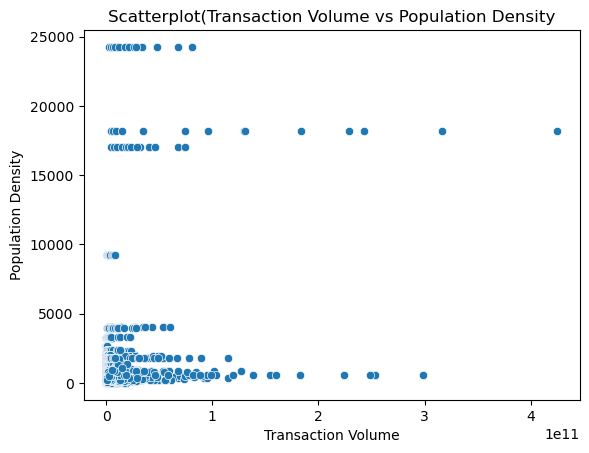

In [93]:
# Scatter plot to visulaize correlation
sns.scatterplot( x = 'Amount (INR)', y = 'Density', data = dist_merge)
plt.title('Scatterplot(Transaction Volume vs Population Density')
plt.xlabel('Transaction Volume')
plt.ylabel('Population Density')
plt.show()

### 4.3 Average transaction amount per user

In [94]:
state_txn_users.head(5)

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [95]:
txn_per_user = state_txn_users.copy()
txn_per_user["avg_txn_per_user"] = txn_per_user["Amount (INR)"] / txn_per_user["Registered Users"]
avg_txn_per_user = txn_per_user.groupby("State", as_index=False)["avg_txn_per_user"].mean()
avg_txn_per_user

,State,avg_txn_per_user
0,Andaman & Nicobar Islands,6846.811194
1,Andhra Pradesh,17502.277427
2,Arunachal Pradesh,9868.093852
3,Assam,8499.768302
4,Bihar,11287.137833
5,Chandigarh,12860.471685
6,Chhattisgarh,9215.205433
7,Dadra & Nagar Haveli and Daman & Diu,6168.978161
8,Delhi,14791.885162
9,Goa,7746.679818


In [99]:
# Top 5 states with highest average transaction amount per user
top5_avg_txn_user = avg_txn_per_user.nlargest(5, "avg_txn_per_user").reset_index(drop=True)
top5_avg_txn_user

,State,avg_txn_per_user
0,Telangana,23774.041127
1,Andhra Pradesh,17502.277427
2,Karnataka,17318.863969
3,Delhi,14791.885162
4,Rajasthan,13708.117474


In [100]:
# Bottom 5 states with lowest average transaction amount per user
bottom5_avg_txn_user = avg_txn_per_user.nsmallest(5, "avg_txn_per_user").reset_index(drop=True)
bottom5_avg_txn_user

,State,avg_txn_per_user
0,Tripura,4956.287167
1,Lakshadweep,5492.605845
2,Kerala,6038.016882
3,Dadra & Nagar Haveli and Daman & Diu,6168.978161
4,Himachal Pradesh,6373.195303


In [101]:
# Highest Avg: Telangana- 23774.04
# Lowest Avg: Tripura- 4956.28
# Spread
avg_txn_spread = top5_avg_txn_user.loc[0,"avg_txn_per_user"] - bottom5_avg_txn_user.loc[0,"avg_txn_per_user"]
avg_txn_spread

np.float64(18817.753959938607)

### 4.4 Device brand usage ratio

In [102]:
state_device_data.tail(5)

,State,Year,Quarter,Brand,Registered Users,Percentage
5539,West Bengal,2021,2,Lenovo,350841,0.019513
5540,West Bengal,2021,2,Asus,297579,0.016551
5541,West Bengal,2021,2,Huawei,272965,0.015182
5542,West Bengal,2021,2,Apple,201393,0.011201
5543,West Bengal,2021,2,Others,1928653,0.107267


In [103]:
# Merge the device data and users data
merged_df2 = pd.merge(state_txn_users, state_device_data, on = "State", how = "inner", suffixes =("_txn","_device"))

# Calculate usage ratio of registered users
merged_df2["device_brand_usage_ratio"] = merged_df2["Registered Users_device"] / merged_df2["Registered Users_txn"]

# Calculate the ratio for each brand by grouping.
device_brand_usage_ratio = merged_df2.groupby(["State","Brand"], as_index=False)["device_brand_usage_ratio"].mean()
device_brand_usage_ratio  

,State,Brand,device_brand_usage_ratio
0,Andaman & Nicobar Islands,Apple,0.034541
1,Andaman & Nicobar Islands,Huawei,0.042546
2,Andaman & Nicobar Islands,Lenovo,0.023150
3,Andaman & Nicobar Islands,Motorola,0.035122
4,Andaman & Nicobar Islands,OnePlus,0.056978
...,...,...,...
443,West Bengal,Others,0.166630
444,West Bengal,Realme,0.088628
445,West Bengal,Samsung,0.290128
446,West Bengal,Vivo,0.178311


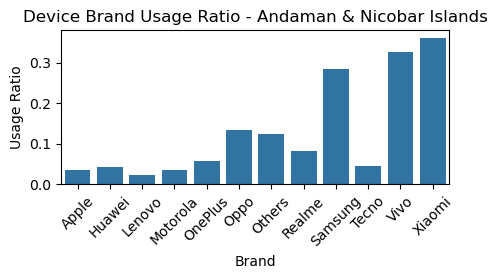

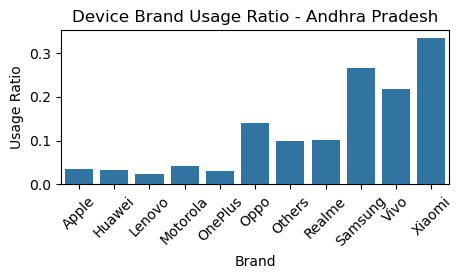

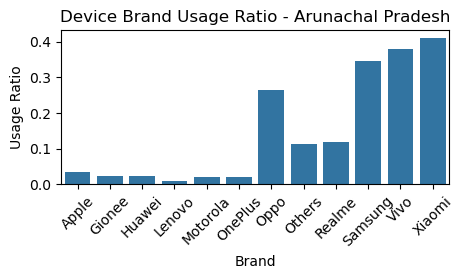

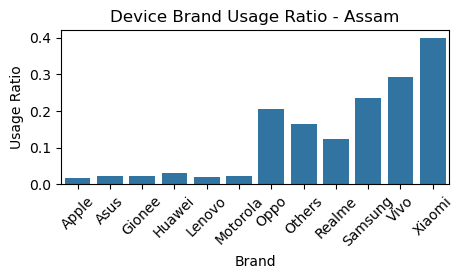

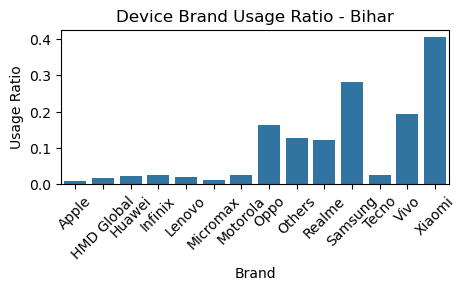

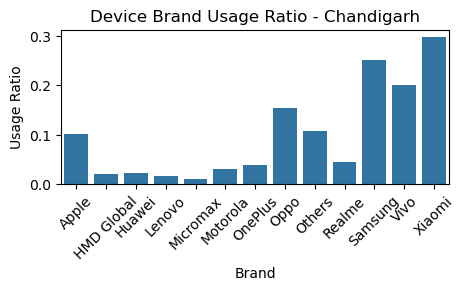

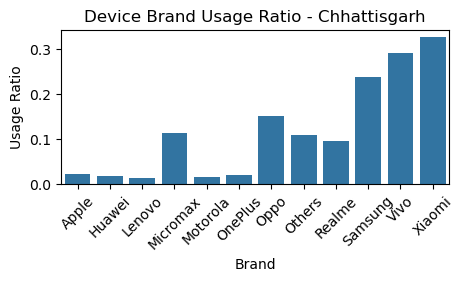

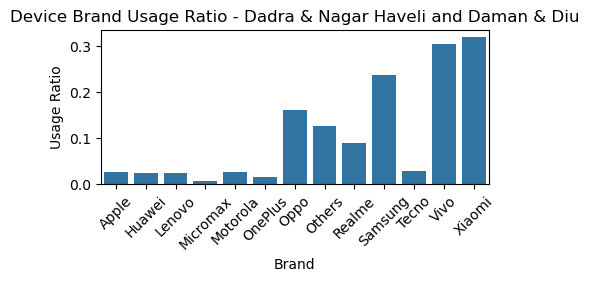

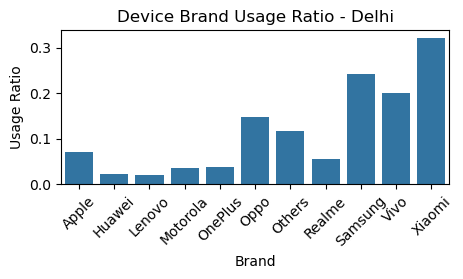

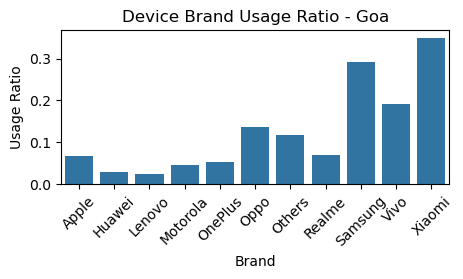

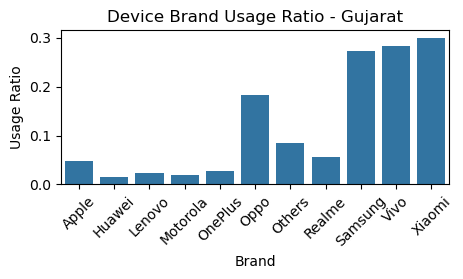

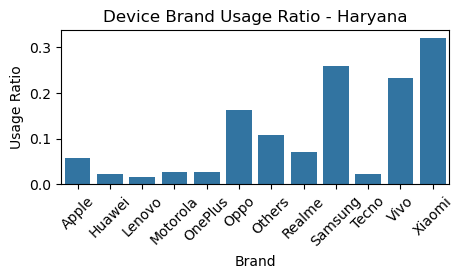

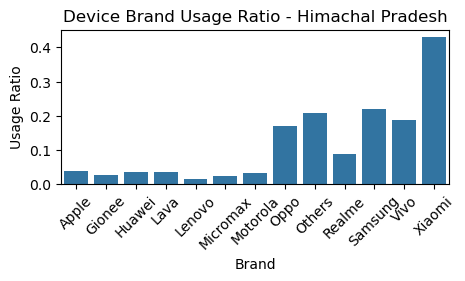

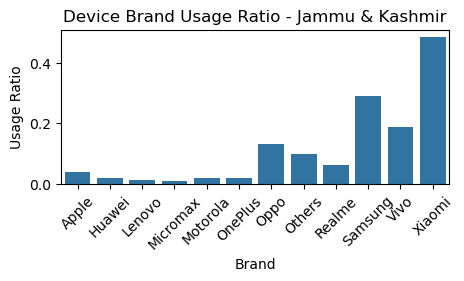

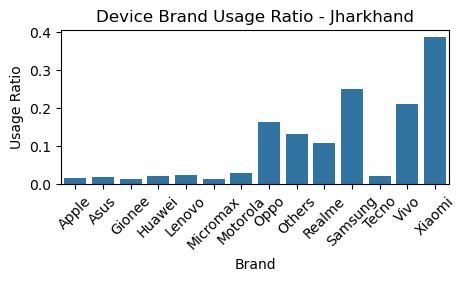

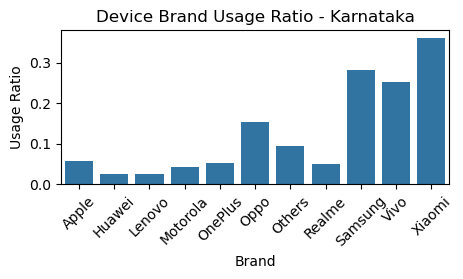

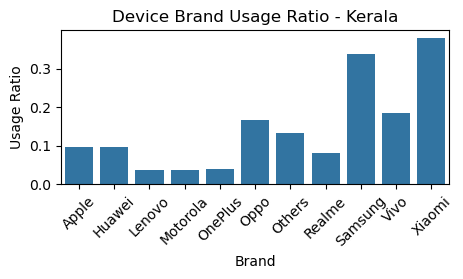

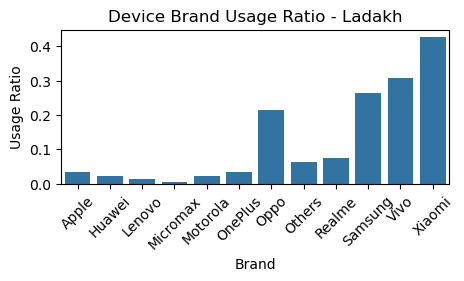

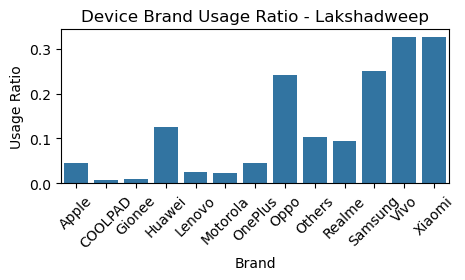

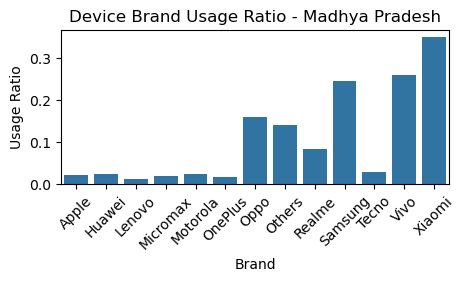

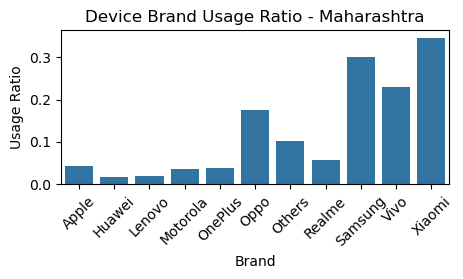

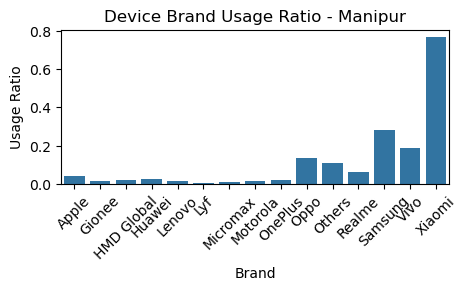

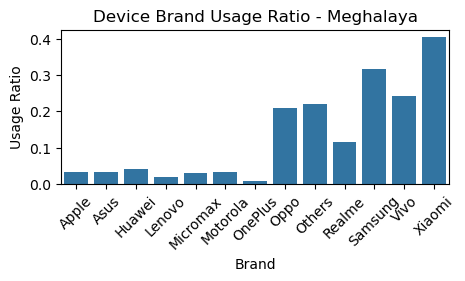

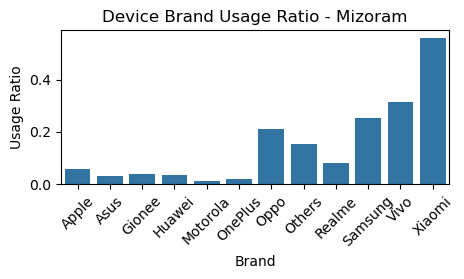

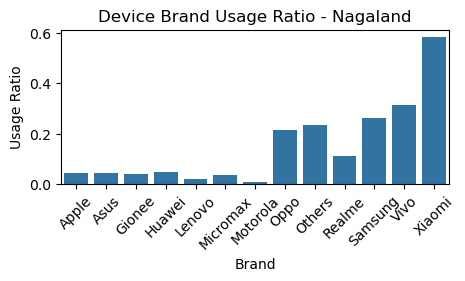

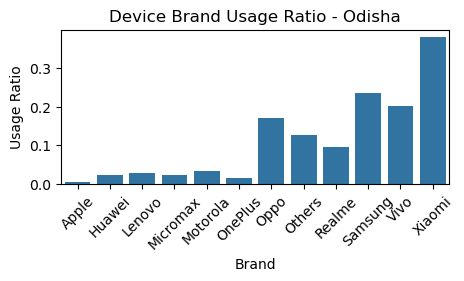

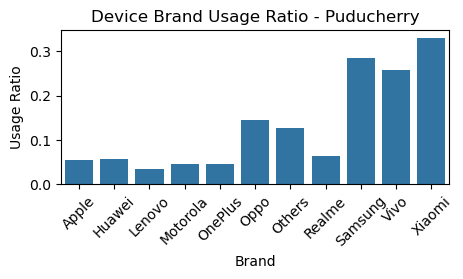

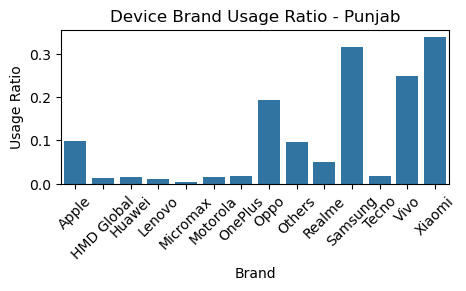

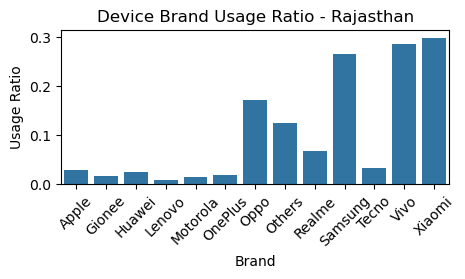

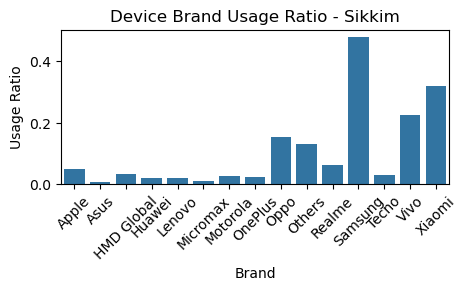

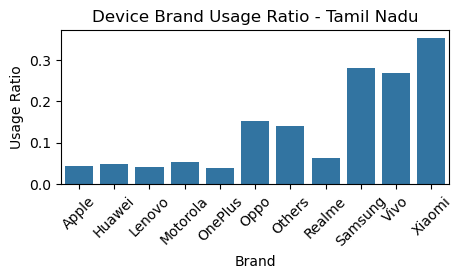

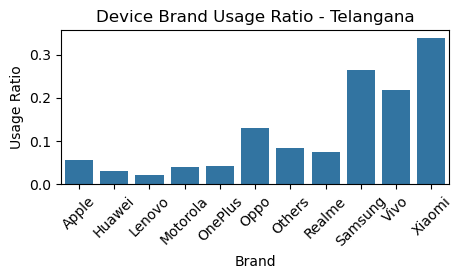

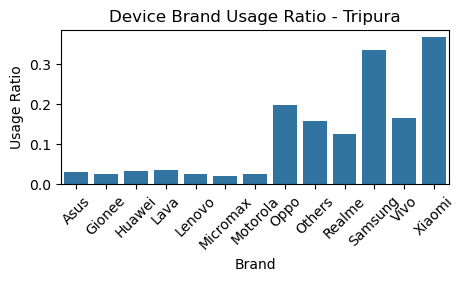

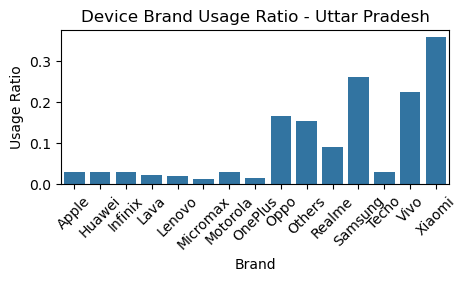

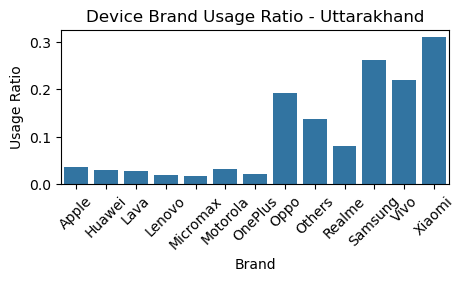

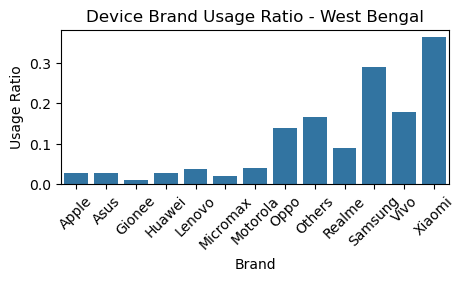

In [104]:
# Bar chart for the ratio of device brand registered users to total registered users for each state
for state, data in device_brand_usage_ratio.groupby("State"):
    plt.figure(figsize=(5, 2))
    sns.barplot(data = data, x = "Brand", y = "device_brand_usage_ratio")

    plt.title(f"Device Brand Usage Ratio - {state}")
    plt.xlabel("Brand")
    plt.ylabel("Usage Ratio")
    plt.xticks(rotation=45)
    plt.show()

## 5. Data Visualization

### 5.1 Line plot for the total transactions and amount over time for a selected state

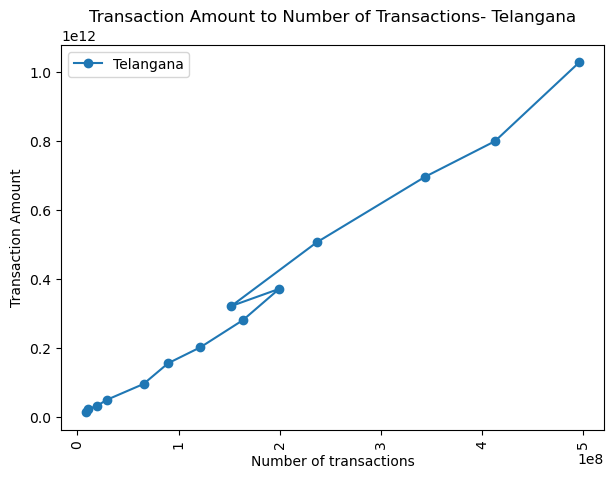

In [105]:
# Line plot for number of transactions to average volume for Telangana
data = state_txn_users[state_txn_users["State"] == "Telangana"]
plt.figure(figsize=(7,5))
plt.plot(data["Transactions"], data["Amount (INR)"], marker = "o", label = 'Telangana')

plt.title("Transaction Amount to Number of Transactions- Telangana")
plt.xlabel("Number of transactions")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=90)

plt.legend()
plt.show()

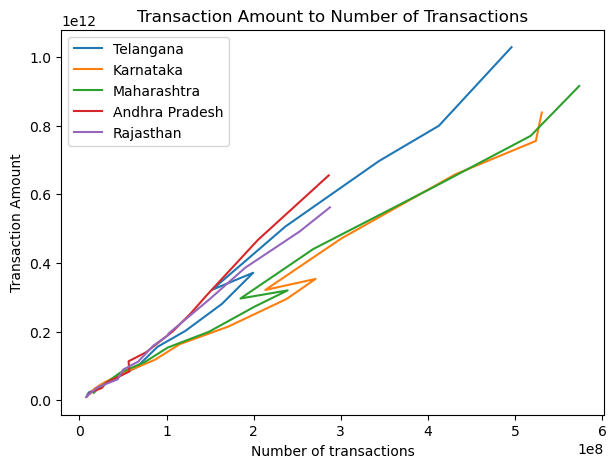

In [114]:
# Line plot for top5 states with highest volume
top_states = top5_highest_volume.index
plt.figure(figsize=(7,5))

for state in top_states:
    data = state_txn_users[state_txn_users["State"] == state]
    plt.plot(data["Transactions"], data["Amount (INR)"], label = state)
    
plt.title("Transaction Amount to Number of Transactions")
plt.xlabel("Number of transactions")
plt.ylabel("Transaction Amount")
plt.tight_layout
plt.legend()
plt.show()

### 5.2 Pie chart showing distribution of transaction type for a selected quarter of a selected state

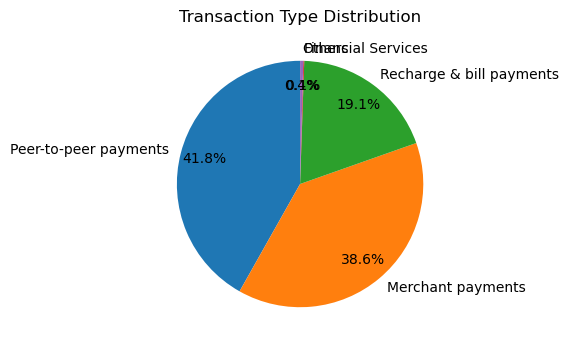

In [113]:
# Filter for the selected state, year and quarter
data2 = state_txn_split[(state_txn_split["State"] == "Uttar Pradesh") & (state_txn_split["Year"] == 2021) & (state_txn_split["Quarter"] == 1)]

# Plot the pie chart for transaction types based on number of transactions
plt.figure(figsize=(4,4))
plt.pie(data2["Transactions"], labels = data2["Transaction Type"], autopct = "%1.1f%%", startangle=90, pctdistance = 0.8, labeldistance =1.1)

plt.title("Transaction Type Distribution")
plt.show()

### 5.3 Bar plot showing population density in districts of a selected state

In [45]:
dist_demographics.head(5)

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
1,Andhra Pradesh,Chittoor,Chittoor,4170468,15152.0,275,AP02,Chittoor
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.0,477,AP03,East Godavari
3,Andhra Pradesh,Guntur,Guntur,4889230,11391.0,429,AP04,Guntur
4,Andhra Pradesh,YSR,Kadapa,2884524,15359.0,188,AP13,YSR


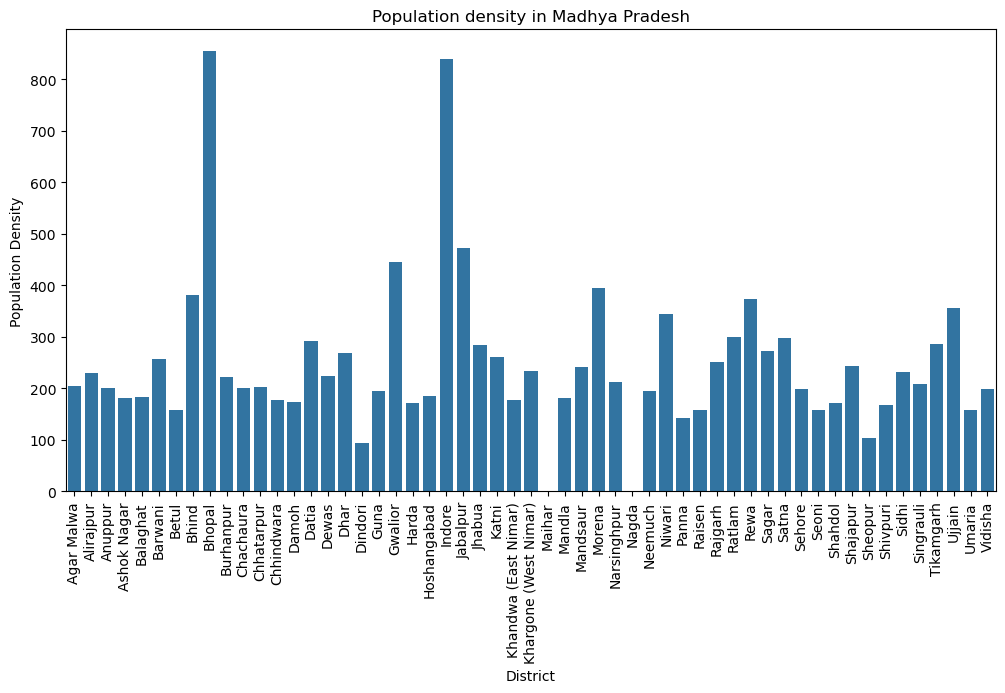

In [111]:
# Plotting a bar chart showing population density
data3 = dist_demographics[dist_demographics["State"] == "Madhya Pradesh"]

plt.figure(figsize = (12,6))
sns.barplot(data = data3, x = "District", y = "Density")
plt.title("Population density in Madhya Pradesh")

plt.xlabel("District")
plt.ylabel("Population Density")
plt.xticks(rotation=90)
plt.show()

## Insights and Conclusion

In [52]:
state_txn_users.head(5)

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


### Transaction Volume over the years

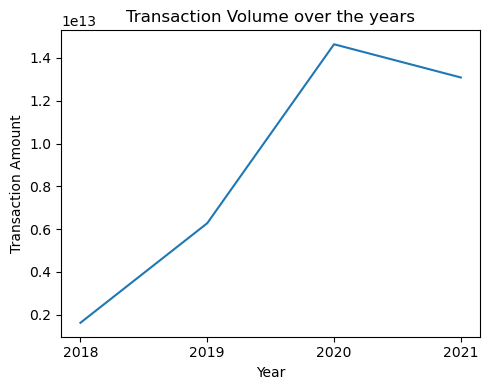

In [117]:
# Transaction Volume over the years
yearly_volume = pd.DataFrame(state_txn_users.groupby("Year")["Amount (INR)"].sum()).reset_index()
yearly_volume["Year"] = yearly_volume["Year"].astype(str)

# Plot the line chart for transaction volume
plt.figure(figsize=(5,4))
plt.plot(yearly_volume["Year"], yearly_volume["Amount (INR)"])
    
plt.title("Transaction Volume over the years")
plt.xlabel("Year")
plt.ylabel("Transaction Amount")

plt.tight_layout()
plt.show()

### Transaction Volume and Registered Users

In [118]:
# Check correlation for transaction volume and registered users
numeric_tips2 = state_txn_users[["Amount (INR)", "Registered Users"]]
correlation2 = numeric_tips2.corr()
correlation2    # strong positive correlation

,Amount (INR),Registered Users
Amount (INR),1.000000,0.846502
Registered Users,0.846502,1.000000


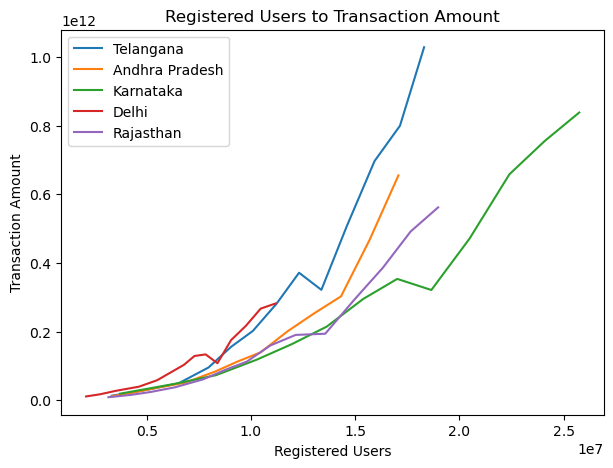

In [119]:
# Transaction Amount with respect to registered users trend over the years for selected 5 states
# Selected states are top 5 with highest average transaction per user
states = top5_avg_txn_user["State"]
plt.figure(figsize=(7,5))

for state in states:
    data = state_txn_users[state_txn_users["State"] == state]
    plt.plot(data["Registered Users"], data["Amount (INR)"], label = state)
    
plt.title("Registered Users to Transaction Amount")
plt.xlabel("Registered Users")
plt.ylabel("Transaction Amount")
plt.tight_layout
plt.legend()
plt.show()

### Number of transactions and Transaction Volume

In [120]:
# Transactions number and volume over the quarters
yearly_txn = state_txn_users.groupby(["Year","Quarter"])[["Transactions","Amount (INR)"]].sum().diff().fillna(0)
yearly_txn.index = yearly_txn.index.to_frame().astype(str).agg("-Q".join,axis=1)
yearly_txn

,Transactions,Amount (INR)
2018-Q1,0.0,0.000000e+00
2018-Q2,52939841.0,1.325408e+11
2018-Q3,153934324.0,1.707273e+11
2018-Q4,75811843.0,1.966347e+11
2019-Q1,291881374.0,3.182851e+11
2019-Q2,106387915.0,3.641927e+11
2019-Q3,279628779.0,3.183450e+11
2019-Q4,365433988.0,5.873348e+11
2020-Q1,162594383.0,4.372187e+11
2020-Q2,-174429156.0,-5.096737e+10


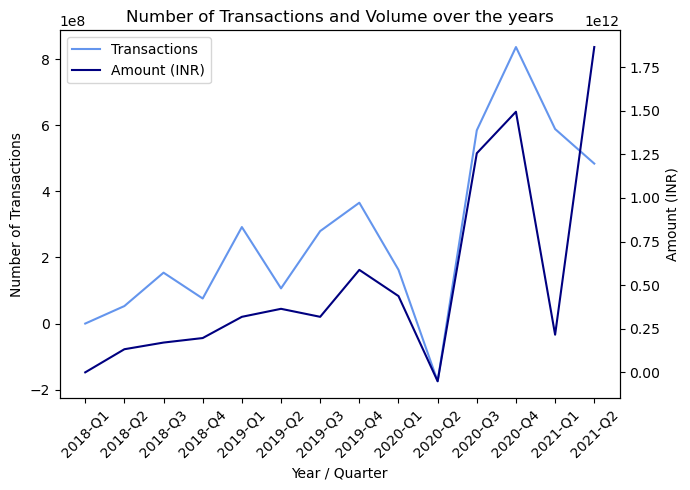

In [121]:
# Line plot to see the trend over the period of time

# Plot figure and size
fig, ax1 = plt.subplots(figsize=(7, 5))

# left y-axis details and set first y-label
line1, = ax1.plot(
    yearly_txn.index,
    yearly_txn["Transactions"],
    color="cornflowerblue",
    label="Transactions"
)
ax1.set_ylabel("Number of Transactions")

# right y-axis details and set second y-label 
ax2 = ax1.twinx()
line2, = ax2.plot(
    yearly_txn.index,
    yearly_txn["Amount (INR)"],
    color="navy",
    label="Amount (INR)"
)
ax2.set_ylabel("Amount (INR)")

# Set x-label and title
ax1.set_xlabel("Year / Quarter")
ax1.set_title("Number of Transactions and Volume over the years")

ax1.tick_params(axis= "x", rotation=45)
ax1.legend(handles=[line1,line2],loc="upper left")
plt.tight_layout()
plt.show()

## Ananlysis Summary & Conclusions

### Insights

In [48]:
print("1. The top 5 states (Telangana, Karnataka, Maharashtra, Andhra Pradesh, Rajasthan) contributed 53.44% of total transaction volume, while the bottom 5 states contributed only 0.08%, with a 12.84% volume gap between the highest and lowest states.")
print("2. Peer-to-peer payments were the dominant transaction type across years, accounting for 44.62% of transactions, followed by merchant payments (33.89%).")
print("3. Xiaomi emerged as the leading device brand with 25.56% of registered users across most states.")
print("4. High-population states such as Uttar Pradesh, Bihar, West Bengal, and Tamil Nadu did not rank among the top 5 states by transaction volume, indicating uneven digital payment adoption.")
print("5. States with the highest Average Transaction Volume (ATV)—Ladakh, Andaman & Nicobar Islands, Mizoram, Lakshadweep, and Arunachal Pradesh—were not among the top-volume states, suggesting usage primarily for high-value transactions.")
print("6. Maharashtra ranked 3rd in total transaction volume despite being among the bottom 5 states in ATV, highlighting high-frequency, low-value usage.")
print("7. Delhi recorded the highest registered user–to–population ratio (0.6661), followed by Daman & Diu (0.5878) and Telangana (0.5034); Telangana achieved the highest transaction volume with only 50.33% penetration.")
print("8. Transaction volume showed a weak positive correlation (0.3367) with population density, indicating transaction activity is not strongly population-driven.")
print("9. The highest average transaction amount per user was observed in Telangana, Andhra Pradesh, Karnataka, Delhi, and Rajasthan, while Tripura, Lakshadweep, Kerala, Dadra & Nagar Haveli, Daman & Diu, and Himachal Pradesh ranked lowest.")
print("10. Device usage patterns remained consistent across states, with Xiaomi maintaining the highest registered user share.")

1. The top 5 states (Telangana, Karnataka, Maharashtra, Andhra Pradesh, Rajasthan) contributed 53.44% of total transaction volume, while the bottom 5 states contributed only 0.08%, with a 12.84% volume gap between the highest and lowest states.
2. Peer-to-peer payments were the dominant transaction type across years, accounting for 44.62% of transactions, followed by merchant payments (33.89%).
3. Xiaomi emerged as the leading device brand with 25.56% of registered users across most states.
4. High-population states such as Uttar Pradesh, Bihar, West Bengal, and Tamil Nadu did not rank among the top 5 states by transaction volume, indicating uneven digital payment adoption.
5. States with the highest Average Transaction Volume (ATV)—Ladakh, Andaman & Nicobar Islands, Mizoram, Lakshadweep, and Arunachal Pradesh—were not among the top-volume states, suggesting usage primarily for high-value transactions.
6. Maharashtra ranked 3rd in total transaction volume despite being among the bottom

### Conclusion

In [50]:
print("The analysis reveals strong regional differences in digital payment behavior, device adoption, and transaction patterns. High-volume states such as Telangana, Karnataka, and Maharashtra demonstrate widespread usage driven by frequent, low-value transactions, while smaller regions like Ladakh and Lakshadweep primarily use the platform for high-value but infrequent payments.")
print()
print("Peer-to-peer transfers dominate in most of the years, confirming the platform’s core use case remains interpersonal transactions rather than merchant-driven activity. Device data shows Xiaomi as the leading brand among registered users, suggesting affordability and widespread market reach significantly influence user onboarding.")
print()
print("Despite large populations, states like Uttar Pradesh and West Bengal do not appear among the top transaction volume regions, indicating that population alone is not a strong driver of digital payment activity. This is further supported by the weak correlation between population density and transaction volumes.")
print()
print("Meanwhile, regions such as Delhi, Daman & Diu, and Telangana display strong user penetration relative to population, suggesting effective digital adoption and awareness. Potential user fatigue, shifting market dynamics, or increased competition can affect app engagement. ")

The analysis reveals strong regional differences in digital payment behavior, device adoption, and transaction patterns. High-volume states such as Telangana, Karnataka, and Maharashtra demonstrate widespread usage driven by frequent, low-value transactions, while smaller regions like Ladakh and Lakshadweep primarily use the platform for high-value but infrequent payments.

Peer-to-peer transfers dominate in most of the years, confirming the platform’s core use case remains interpersonal transactions rather than merchant-driven activity. Device data shows Xiaomi as the leading brand among registered users, suggesting affordability and widespread market reach significantly influence user onboarding.

Despite large populations, states like Uttar Pradesh and West Bengal do not appear among the top transaction volume regions, indicating that population alone is not a strong driver of digital payment activity. This is further supported by the weak correlation between population density and 

### Recommendations

In [49]:
print("1. Increase engagement in high-population but low-transaction states through localized campaigns, expanded merchant onboarding, and incentives for small-value transactions.")
print("2. Promote merchant payments to balance the transaction mix and reduce reliance on peer-to-peer payments, which currently account for 44.62% of transactions.")
print("3. Improve app engagement by introducing personalized nudges, rewards, and UX enhancements to reactivate and retain users")
print("4. Leverage Xiaomi’s 25.56% user share through strategic partnerships and device-level optimizations to enhance onboarding and performance.")
print("5. Introduce premium or high-value transaction features in high-ATV states where users make fewer but larger transactions.")
print("6. Enhance digital literacy and awareness of diverse use cases in states with low transaction activity or low ATV to drive broader adoption.")
print("7. Use high-adoption states such as Delhi, Daman & Diu, and Telangana as pilot markets for new features and product experimentation.")

1. Increase engagement in high-population but low-transaction states through localized campaigns, expanded merchant onboarding, and incentives for small-value transactions.
2. Promote merchant payments to balance the transaction mix and reduce reliance on peer-to-peer payments, which currently account for 44.62% of transactions.
3. Improve app engagement by introducing personalized nudges, rewards, and UX enhancements to reactivate and retain users
4. Leverage Xiaomi’s 25.56% user share through strategic partnerships and device-level optimizations to enhance onboarding and performance.
5. Introduce premium or high-value transaction features in high-ATV states where users make fewer but larger transactions.
6. Enhance digital literacy and awareness of diverse use cases in states with low transaction activity or low ATV to drive broader adoption.
7. Use high-adoption states such as Delhi, Daman & Diu, and Telangana as pilot markets for new features and product experimentation.
